<a href="https://colab.research.google.com/github/BlancoAnna/DL--2025/blob/main/Problems%203%20-%20Intro%20to%20PyTorch/P3_Intro_Pytorch_Tensors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In SageMaker Studio Lab](https://studiolab.sagemaker.aws/studiolab.svg)](https://studiolab.sagemaker.aws/import/github/dkaratzas/DL2022-23/blob/main/Problems%202%20-%20Using%20Autograd%20and%20PyTorch/P2_2_Intro_Tensors.ipynb)

# What is PyTorch?

<a href="https://pytorch.org/">Pytorch</a> is a Python based scientific computing package targeted at two types of audience:

-  At the low level, it is a tensor library capable to exploit the computational power of GPUs
-  At the high level, it is a deep learning research platform that provides maximum flexibility and speed

## Import the library

In [1]:
import torch

## Getting help in Jupyter

The fastest way to get some quick help on something using Jupyter is to just ask! Type any Python object name you want followed by a question mark `?` and the code documentation will be loaded in your notebook. Try it with `torch`

In [2]:
torch?

The following command will list all objects of torch that with a name that finishes with "Tensor"

In [3]:
# In Colab, you can press <esc> to get out of help
torch.*Tensor?

If you use Colab, you also have a handy autocomplete feature at hand. For example, start writing a function name, like `torch.sqrt` if you pause after the first few characters a context menu with possible options will appear. Select the term you meant and press Tab or Enter to autocomplete. Note, this will not work in Jupyter Lab / Notebook out of the box, you would need to install an extension to enable this functionality.

In [4]:
# start typing torch.sqr...  wait and then use <Tab> or <Enter> to autocomplete to torch.sqrt()
torch.sqrt

<function torch._VariableFunctionsClass.sqrt>

In Jupyter Lab (but not in CoLab) you can access the documentation by clicking on the Python object and pressing `<Shift>` + `<Tab>`. Try it in the line below (if you are using Jupyter Lab)

In [5]:
torch.nn.Module()  # <Shift>+<Tab>

Module()

You should see the same result as with the line below

In [6]:
# Annotate your functions / classes!
torch.nn.Module?

Where does this documentation come from? Part of it comes from the code itself, and part of it from the annotations (special comments) that are introduced in the function / class definitions. To have a look at the actual code of a function, just use a double `??`. See for example below, and get used to annotating your functions / classes as well!

In [7]:
torch.nn.Module??

## Torch!

At the core of PyTorch there is the `Tensor` class. It is very much like numpy's arrays, but supports autograd.

In [8]:
# Generate a tensor of size 2x3x4
t = torch.Tensor(2, 3, 4)
type(t)

torch.Tensor

In [9]:
# Get the size of the tensor
t.size()

torch.Size([2, 3, 4])

# Tensors and tensors

In [10]:
t = torch.Tensor(2, 3, 4)
type(t)

torch.Tensor

In [11]:
t.shape

torch.Size([2, 3, 4])

In [12]:
t

tensor([[[2.1715e-18, 2.1512e+23, 8.3558e+20, 1.3294e-08],
         [4.2130e+21, 1.6994e-04, 8.5039e+20, 1.7299e-04],
         [6.6767e+22, 2.6728e-06, 2.1707e-18, 1.6678e+19]],

        [[7.0976e+22, 2.1715e-18, 4.2330e+21, 1.6534e+19],
         [1.1625e+27, 1.4580e-19, 7.1856e+22, 4.3605e+27],
         [1.5766e-19, 7.1856e+22, 4.3605e+27, 1.4580e-19]]])

In [13]:
t1 = torch.tensor([1, 2, 3, 4])
type(t1)

torch.Tensor

In [14]:
t1

tensor([1, 2, 3, 4])

In [15]:
t1.shape

torch.Size([4])

In [16]:
t2 = torch.tensor([[[1, 2, 3, 4], [1, 2, 3, 4], [1, 2, 3, 4]], [[1, 2, 3, 4], [1, 2, 3, 4], [1, 2, 3, 4]]])
type(t2)

torch.Tensor

In [17]:
t2

tensor([[[1, 2, 3, 4],
         [1, 2, 3, 4],
         [1, 2, 3, 4]],

        [[1, 2, 3, 4],
         [1, 2, 3, 4],
         [1, 2, 3, 4]]])

In [18]:
t2.shape

torch.Size([2, 3, 4])

In [19]:
torch.zeros(2, 3, 4)

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

# Dimensions

In [20]:
t = torch.Tensor(2, 3, 4)
# prints dimensional space and sub-dimensions
print(f'point in a {t.numel()} dimensional space')
print(f'organised in {t.dim()} sub-dimensions')

point in a 24 dimensional space
organised in 3 sub-dimensions


> Don't confuse a 3D vector with a 3D tensor. _Dimensionality_ can refer to either the number of entries along a specific axis (as in a 3D vector) or the number of axes in a tensor (such as a 3D tensor), which can be confusing. You may also come across the term _tensor of rank_ 3, where rank refers to the number of axes.

In [21]:
t

tensor([[[-1.1452e-21,  4.4547e-41, -1.1452e-21,  4.4547e-41],
         [ 4.4842e-44,  0.0000e+00,  8.9683e-44,  0.0000e+00],
         [ 4.7860e-41,  0.0000e+00,  4.2740e-43,  0.0000e+00]],

        [[ 6.4296e-34,  0.0000e+00,  5.2428e-34,  0.0000e+00],
         [ 7.8918e+34,  4.4547e-41,  0.0000e+00,  0.0000e+00],
         [ 0.0000e+00,  0.0000e+00,  9.1084e-44,  0.0000e+00]]])

In [22]:
# Mind the underscore!
# Any operation that mutates a tensor in-place is post-fixed with an _.
# For example: x.copy_(y), x.t_(), x.random_(n) will change x.
t.random_(10)

tensor([[[6., 4., 3., 6.],
         [9., 5., 8., 1.],
         [0., 0., 2., 1.]],

        [[6., 3., 2., 1.],
         [0., 5., 0., 7.],
         [2., 4., 5., 2.]]])

In [23]:
r = t.view(3, 8) # r is the Tensor reshaped to the size 3x8
r

tensor([[6., 4., 3., 6., 9., 5., 8., 1.],
        [0., 0., 2., 1., 6., 3., 2., 1.],
        [0., 5., 0., 7., 2., 4., 5., 2.]])

In [24]:
# As you can see zero_ would replace r with 0's which was originally filled with integers
r.zero_()

tensor([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])

In [25]:
t

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [26]:
# What are strides. And how are they related to shapes?
print(t.stride(), r.stride())
print(t.shape, r.shape)

(12, 4, 1) (8, 1)
torch.Size([2, 3, 4]) torch.Size([3, 8])


In [27]:
# Let's try that again without doing the operations in place
t.random_(10)

tensor([[[2., 9., 1., 4.],
         [7., 9., 2., 7.],
         [7., 7., 1., 3.]],

        [[0., 7., 1., 8.],
         [9., 8., 0., 9.],
         [9., 0., 3., 1.]]])

In [28]:
# Not in place
r = t.view(3, 8)
r = torch.zeros_like(r)
r

tensor([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])

In [29]:
t

tensor([[[2., 9., 1., 4.],
         [7., 9., 2., 7.],
         [7., 7., 1., 3.]],

        [[0., 7., 1., 8.],
         [9., 8., 0., 9.],
         [9., 0., 3., 1.]]])

In [30]:
# What are strides?
print(t.stride(), r.stride())

(12, 4, 1) (8, 1)


In [31]:
# This *is* important
s = r.clone()

In [32]:
# In-place fill of 1's
s.fill_(1)
s

tensor([[1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.]])

In [33]:
# Because we cloned r, even though we did an in-place operation, this doesn't affect r
r

tensor([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])

## Vectors (1D Tensors)

In [34]:
# Creates a 1D tensor of integers 1 to 4
v = torch.Tensor([1, 2, 3, 4])
v

tensor([1., 2., 3., 4.])

In [35]:
# Print number of dimensions (1D) and size of tensor
print(f'dim: {v.dim()}, size: {v.size()[0]}')

dim: 1, size: 4


In [36]:
w = torch.Tensor([1, 0, 2, 0])
w

tensor([1., 0., 2., 0.])

In [37]:
# Element-wise multiplication
v * w

tensor([1., 0., 6., 0.])

In [38]:
# Scalar (dot) product: 1*1 + 2*0 + 3*2 + 4*0
v @ w

tensor(7.)

In [39]:
# In-place replacement of random number from 0 to 10
x = torch.Tensor(5).random_(10)
x

tensor([3., 6., 8., 1., 4.])

In [40]:
print(f'first: {x[0]}, last: {x[-1]}')

first: 3.0, last: 4.0


In [41]:
# Extract sub-Tensor [from:to)
x[1:2 + 1]

tensor([6., 8.])

In [42]:
# Create a tensor with integers ranging from 1 to 4 (both included)
v = torch.arange(1, 5)
v

tensor([1, 2, 3, 4])

In [43]:
# Square all elements in the tensor
print(v.pow(2), v)

tensor([ 1,  4,  9, 16]) tensor([1, 2, 3, 4])


## Matrices (2D Tensors)

In [44]:
# Create a 2x4 tensor
m = torch.Tensor([[2, 5, 3, 7],
                  [4, 2, 1, 9]])
m

tensor([[2., 5., 3., 7.],
        [4., 2., 1., 9.]])

In [45]:
m.dim()

2

In [46]:
print(m.size(0), m.size(1), m.size(), sep=' -- ')

2 -- 4 -- torch.Size([2, 4])


In [47]:
# Indexing row 0, column 2 (0-indexed)
m[0][2]

tensor(3.)

In [48]:
# Indexing row 0, column 2 (0-indexed)
m[0, 2]

tensor(3.)

In [49]:
# Indexing column 1, all rows (returns size 2)
m[:, 1]

tensor([5., 2.])

In [50]:
# Indexing column 1, all rows (returns size 2x1)
m[:, [1]]

tensor([[5.],
        [2.]])

In [51]:
# Indexes row 0, all columns (returns 1x4)
m[[0], :]

tensor([[2., 5., 3., 7.]])

In [52]:
# Create tensor of numbers from 1 to 5)
v = torch.arange(1., 5)
v

tensor([1., 2., 3., 4.])

In [53]:
m

tensor([[2., 5., 3., 7.],
        [4., 2., 1., 9.]])

In [54]:
# Scalar product
m @ v

tensor([49., 47.])

In [55]:
# Calculated by 1*2 + 2*5 + 3*3 + 4*7
m[0, :] @ v

tensor(49.)

In [56]:
# Calculated by
m[[1], :] @ v

tensor([47.])

In [57]:
# Add a random tensor of size 2x4 to m
m + torch.rand(2, 4)

tensor([[2.7326, 5.5704, 3.7844, 7.0032],
        [4.0930, 2.0963, 1.0505, 9.0490]])

In [58]:
# Subtract a random tensor of size 2x4 to m
m - torch.rand(2, 4)

tensor([[1.0147, 4.3569, 2.2564, 6.2241],
        [3.3270, 1.7251, 0.2639, 8.3616]])

In [59]:
# Multiply a random tensor of size 2x4 to m
m * torch.rand(2, 4)

tensor([[1.9624, 4.3379, 2.1761, 4.4553],
        [0.6108, 0.7395, 0.8205, 5.3655]])

In [60]:
# Divide m by a random tensor of size 2x4
m / torch.rand(2, 4)

tensor([[ 4.1389,  6.7500,  7.0964,  8.8030],
        [ 8.7740,  9.5636,  1.3931, 45.1555]])

In [61]:
m.size()

torch.Size([2, 4])

In [62]:
# Transpose tensor m, which is essentially 2x4 to 4x2
m.t()

tensor([[2., 4.],
        [5., 2.],
        [3., 1.],
        [7., 9.]])

In [63]:
# Same as
m.transpose(0, 1)

tensor([[2., 4.],
        [5., 2.],
        [3., 1.],
        [7., 9.]])

In [64]:
# Same as
m.transpose(1, 0)

tensor([[2., 4.],
        [5., 2.],
        [3., 1.],
        [7., 9.]])

## Broadcasting

Two tensors are “broadcastable” if the following rules hold:

*   Each tensor has at least one dimension.
*   When iterating over the dimension sizes, starting at the trailing dimension, the dimension sizes must either be equal, one of them is 1, or one of them does not exist.


In [65]:
x=torch.empty(5,7,3)
y=torch.empty(5,7,3)
# x and y are broadcastable since all dimensions are equal

x=torch.empty((0,))
y=torch.empty(2,2)
# x and y are not broadcastable, because x does not have at least 1 dimension

x=torch.empty(5,3,4,1)
y=torch.empty(  3,1,1)
# x and y are broadcastable.
# 1st trailing dimension: both have size 1
# 2nd trailing dimension: y has size 1
# 3rd trailing dimension: x size == y size
# 4th trailing dimension: y dimension doesn't exist

# but:
x=torch.empty(5,2,4,1)
y=torch.empty(  3,1,1)
# x and y are not broadcastable, because in the 3rd trailing dimension 2 != 3

In [66]:
# How is the output dimension calculated?
x=torch.empty(5,1,4,1)
y=torch.empty(3,1,1)
print((x+y).size())

x=torch.empty(1)
y=torch.empty(3,1,7)
print((x+y).size())

torch.Size([5, 3, 4, 1])
torch.Size([3, 1, 7])


## Constructors

In [67]:
# Create tensor from 3 to 8
torch.arange(3., 8 + 1)

tensor([3., 4., 5., 6., 7., 8.])

In [68]:
# Create tensor from 5.7 to -2.1 with step -3
torch.arange(5.7, -2.1, -3)

tensor([ 5.7000,  2.7000, -0.3000])

In [69]:
# returns a 1D tensor of equally spaced elements between start=3, end=8 and number of elements=20
torch.linspace(3, 8, 20).view(1, -1)

tensor([[3.0000, 3.2632, 3.5263, 3.7895, 4.0526, 4.3158, 4.5789, 4.8421, 5.1053,
         5.3684, 5.6316, 5.8947, 6.1579, 6.4211, 6.6842, 6.9474, 7.2105, 7.4737,
         7.7368, 8.0000]])

In [70]:
# Create a tensor filled with 0's
torch.zeros(3, 5)

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])

In [71]:
# Create a tensor filled with 1's
torch.ones(3, 2, 5)

tensor([[[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]]])

In [72]:
# Create a tensor with the diagonal filled with 1
torch.eye(3)

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

In [73]:
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

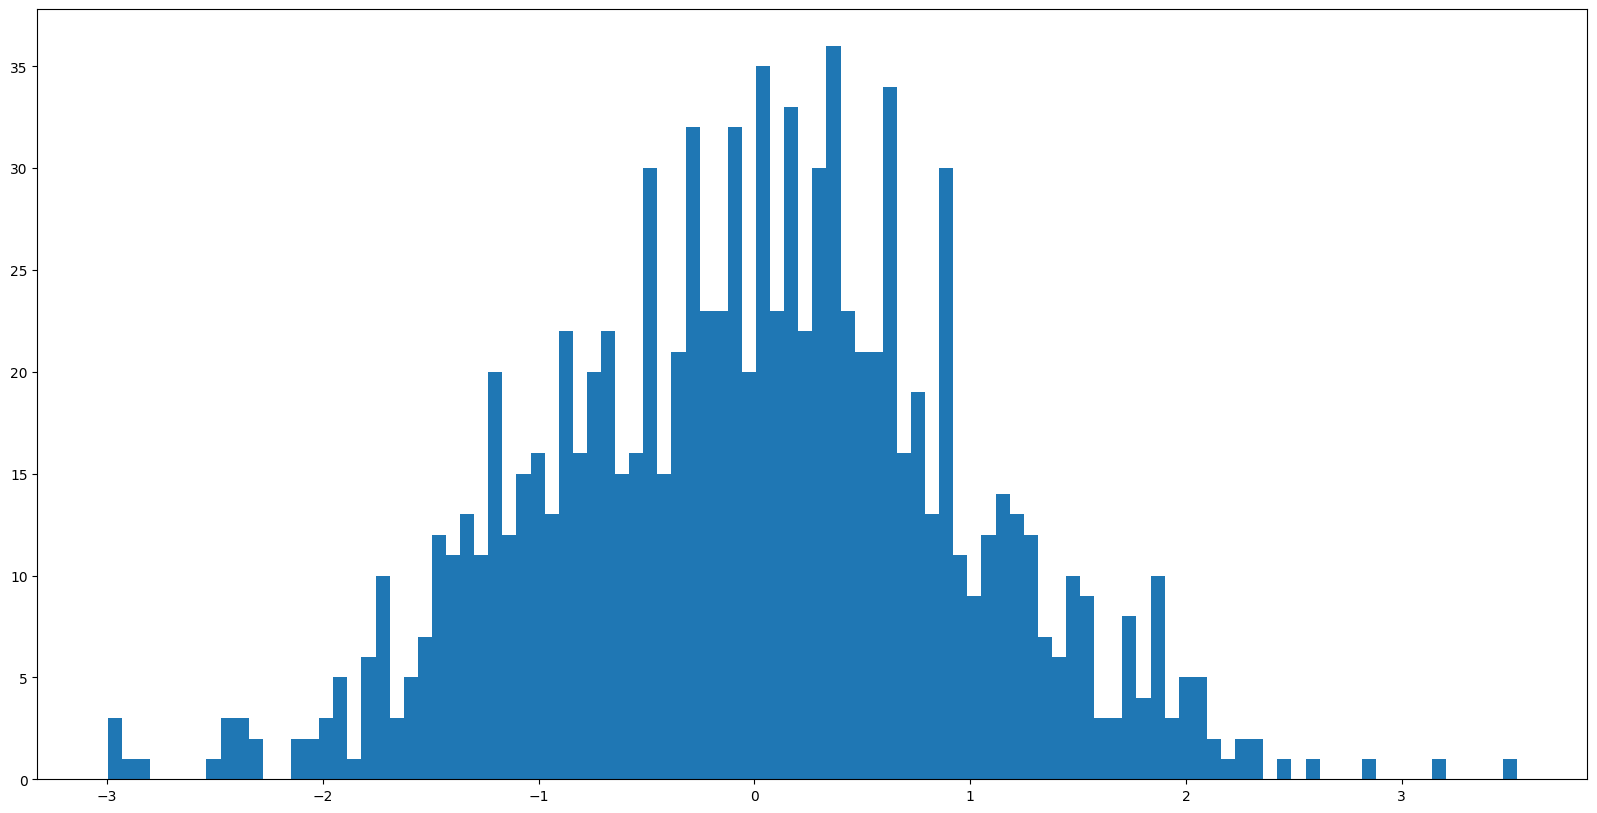

In [74]:
# Numpy bridge!
plt.hist(torch.randn(1000).numpy(), 100);

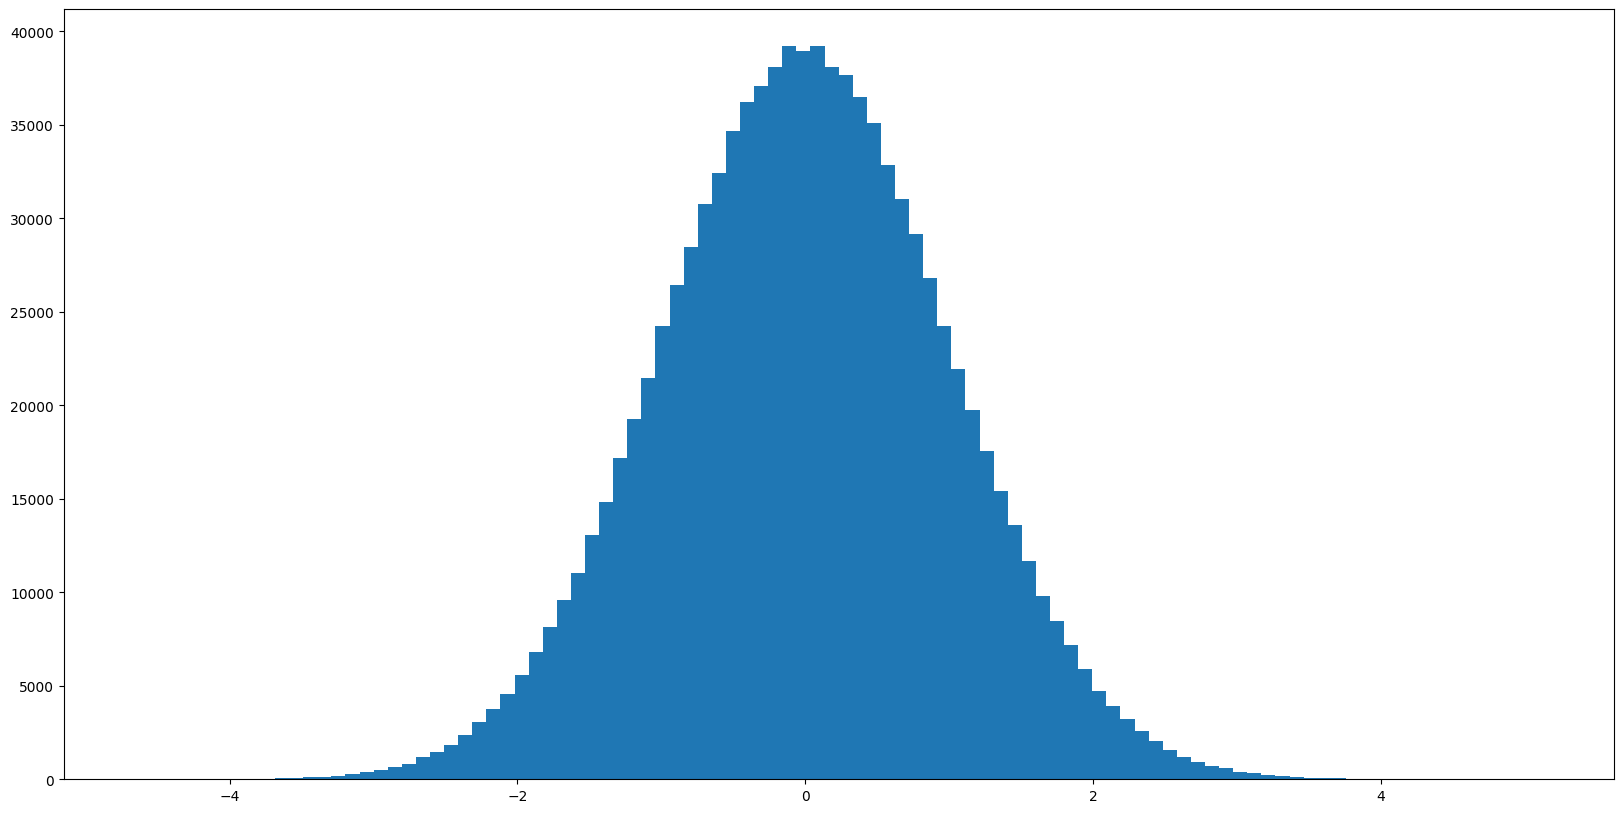

In [75]:
plt.hist(torch.randn(10**6).numpy(), 100);

## Casting

In [76]:
# Helper to get what kind of tensor types- Changing the data type
torch.*Tensor?

In [77]:
m = torch.Tensor([[2, 5, 3, 7],
                  [4, 2, 1, 9]])
m

tensor([[2., 5., 3., 7.],
        [4., 2., 1., 9.]])

In [78]:
# This is basically a 64 bit float tensor
m_double = m.double()
m_double

tensor([[2., 5., 3., 7.],
        [4., 2., 1., 9.]], dtype=torch.float64)

In [79]:
# This creates a tensor of type int8
m_byte = m.byte()
m_byte

tensor([[2, 5, 3, 7],
        [4, 2, 1, 9]], dtype=torch.uint8)

In [80]:
# Converts tensor to numpy array
m_np = m.numpy()
m_np

array([[2., 5., 3., 7.],
       [4., 2., 1., 9.]], dtype=float32)

In [81]:
# In-place fill of column 0 and row 0 with value -1
m_np[0, 0] = -1
m_np

array([[-1.,  5.,  3.,  7.],
       [ 4.,  2.,  1.,  9.]], dtype=float32)

In [82]:
m

tensor([[-1.,  5.,  3.,  7.],
        [ 4.,  2.,  1.,  9.]])

In [83]:
# Create a tensor of integers ranging from 0 to 4
import numpy as np
n_np = np.arange(5)
n = torch.from_numpy(n_np)
print(n_np, n)

[0 1 2 3 4] tensor([0, 1, 2, 3, 4])


In [84]:
# In-place multiplication of all elements by 2 for tensor n
n.mul_(2)
print(n_np, n)

[0 2 4 6 8] tensor([0, 2, 4, 6, 8])


## Using the GPU

In [85]:
# If this cell fails you need to change the runtime of your colab notebook to GPU
# Go to Runtime -> Change Runtime Type and select GPU
assert torch.cuda.is_available(), "GPU is not enabled"

# use the first gpu available if possible
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [86]:
# Tensors can be moved between gpu and cpu memory

tensor = torch.randn(5, 5) # create a 5x5 matrix filled with random numbers
print(f"tensor's device: {tensor.device}") # by default tensors are stored in cpu memory (RAM)

# Move your tensor to GPU device 0 if there is one (first GPU in the system)
if torch.cuda.is_available():
    tensor = tensor.to(device) # tensor.cuda() is an alternative although not recommended
print(f"tensor's device: {tensor.device}")

tensor's device: cpu
tensor's device: cuda:0


In [87]:
# A common mistake
a = torch.randn(5, 2, device=device)
b = torch.randn(1, 2)

# This throws an exception, since you can't operate on tensors stored in
# different devices, and the error message is pretty clear about that
c = a * b

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu!

# Gradient Computation



In [88]:
# Tensors also track the operations applied on them in order to differentiate them

# setting requires_grad to true tells the autograd engine that we want to compute
# gradients for this tensor
a = torch.tensor([2., 3.], requires_grad=True)

L = 3*a**3
L.sum().backward()  # Convert to scalar before back-propagation
print(f"Gradient of L with respecto to a: {a.grad}")

Gradient of L with respecto to a: tensor([36., 81.])


Lets check if the computed gradients are correct:

$\frac{\partial{L}}{\partial{a}} = [9 * a_1^2, 9 * a_2^2]$

$\frac{\partial{L}}{\partial{a}} = [9 * 2^2, 9 * 3^2]$

$\frac{\partial{L}}{\partial{a}} = [36, 81]$

As we can see the gradient vector matches the one computed by the autograd engine (no surprise there)

In [89]:
# Notice that the output tensor of an operation will require gradients even
# if only a single input tensor has requires_grad=True.

x = torch.rand(5, 5)
y = torch.rand(5, 5)
z = torch.rand((5, 5), requires_grad=True)

a = x + y
print(f"Does a require gradients? : {a.requires_grad}")
b = x + z
print(f"Does b require gradients?: {b.requires_grad}")

Does a require gradients? : False
Does b require gradients?: True


# Autograd with Pytorch: Repeat previous exercise


```
# This is formatted as code
```

Let's repeat with PyTorch one of the gradient calculations what we already did before outselves (with our own auto-differentiation engine):

In [90]:
a = torch.tensor(4.0, requires_grad = True)  # a = 4
b = torch.tensor(3.0, requires_grad = True)  # b = 3
c = a + b        # c = 4 + 3

res = a * c      # res = a * c = 28

print("Result =", res)

Result = tensor(28., grad_fn=<MulBackward0>)


See the warning that the next cell will produce:

In [91]:
# Call backprop on the result
res.backward()

# Now all variables should contain in their "grad" the derivative d(res) / d(variable)
print("The derivative of the result with respect to a is:", a.grad)
print("The derivative of the result with respect to b is:", b.grad)
# Also for intermediate results
print("The derivative of the result with respect to c is:", c.grad)

The derivative of the result with respect to a is: tensor(11.)
The derivative of the result with respect to b is: tensor(4.)
The derivative of the result with respect to c is: None


<ipython-input-91-46824604471b>:8: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:489.)
  print("The derivative of the result with respect to c is:", c.grad)


There are three different things to understand here. PyTorch by default only calculates gradients for the leaf nodes of the computation graph. To do that, all nodes that are necessary for the computation require their gradient to be computed, but the gradient is not maintained, they do not have a `grad` variable. We can ask PyTorch to create a `grad` variable and save the gradient in these intermediate nodes though, if for some reason we are interested in accessing it.

In [92]:
c.requires_grad

True

In [93]:
c.retains_grad

False

In [94]:
c.is_leaf

False

In [95]:
c.retain_grad()

print(f"Requires Grad: {c.requires_grad}\tRetains Grad: {c.retains_grad}\tIs leaf: {c.is_leaf}")

Requires Grad: True	Retains Grad: True	Is leaf: False


In [96]:
a = torch.tensor(4.0, requires_grad = True)  # a = 4
b = torch.tensor(3.0, requires_grad = True)  # b = 3
c = a + b        # c = 4 + 3
c.retain_grad()

res = a * c      # res = a * c = 28

print("Result =", res)

# Call backprop on the result
res.backward()

# Now all variables should contain in their "grad" the derivative d(res) / d(variable)
print("The derivative of the result with respect to a is:", a.grad)
print("The derivative of the result with respect to b is:", b.grad)
# Also for intermediate results
print("The derivative of the result with respect to c is:", c.grad)

Result = tensor(28., grad_fn=<MulBackward0>)
The derivative of the result with respect to a is: tensor(11.)
The derivative of the result with respect to b is: tensor(4.)
The derivative of the result with respect to c is: tensor(4.)


## Much more

There's definitely much more, but this was the basics about `Tensor`s fun.

*Torch* full API can be found [here](https://pytorch.org/docs/stable/index.html).
You'll find 100+ `Tensor` operations, including transposing, indexing, slicing, mathematical operations, linear algebra, random numbers, etc are described.

# Homework

<font color="blue">**Exercise 1:** The code below simulates a tiny neural network, however it throws an exception. As you build neural networks in PyTorch you will see this exception often. Look at the error message, explain whats happening and make the necessary changes to the code to get an output from this tiny network</font>

In [97]:
### Generate some data
torch.manual_seed(7) # Set the random seed so things are predictable

# Features are 5 random normal variables
features = torch.randn((1, 5))
# True weights for our data, random normal variables again
weights = torch.randn_like(features)
# Transpose weights to have shape (5, 1)
weights = weights.T
# and a true bias term
bias = torch.randn((1, 1))
fts = torch.mm(features, weights)
print(fts + bias)
print(fts.shape, bias.shape)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x5 and 1x5)

<font color="blue">**Exercise 2:** Once you manage to sucessfully run the code above notice how the shape of the tensors ```fts``` and ```bias``` are drastically different, yet they can be added together. Which internal PyTorch mechanism makes this addition happen?</font>

---

*Your Answer Here*

---

# More Homework

<font color="blue">**Exercise 3:** Answer the following questions about the cell below</font>

1. Does the value of ```t``` change? Why?
2. Does the shape of ```t``` change? Why?
3. Explain, in your own words. What is the stride of a tensor, why is it convenient to have them?
4.  Pick a mathematical operation like cosine or square root (not those though 🙂). Can you find the correspoding function in the [torch library](https://https://pytorch.org/docs/stable/torch.html#pointwise-ops).
5. Apply the function element-wise to ```a```.
6. Is there a version of the function that operates in place? Does it return an error? Why? How can it be fixed?
7. Run the same function on the GPU. Do you notice any difference in runtime? If not, why do you think that is?

In [ ]:
t = torch.tensor(list(range(9)))

a = t.view(3, 3)
a.mul_(2)